# File Mount

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir('/content/drive/MyDrive/Class File')

# Digital image

### Color Image

Color | RGB value   |
-------|:------------------|
Red  | 255, 0, 0   | 
Orange | 255, 128, 0  | 
Pink  | 255, 153, 255 | 


### OpenCV imread
retval	=	cv.imread(	filename[, flags]	)

In the case of color images, the decoded images will have the channels stored in B G R order.

[cv.imread()](https://docs.opencv.org/3.4/d4/da8/group__imgcodecs.html)

![](https://i.imgur.com/qHhzwqQ.png)


### matplotlib.pyplot.imshow
(X,cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, *, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)

(M, N, 3): an image with RGB values (0-1 float or 0-255 int).

(M, N, 4): an image with RGBA values (0-1 float or 0-255 int),  i.e. including transparency

![image.png](https://i.imgur.com/Sl4fkuJ.png)



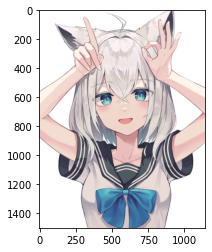

In [ ]:
from IPython.display import display
from PIL import Image
from  matplotlib import pyplot as plt
import cv2
import numpy as np
image = cv2.imread("fubuki.jpg") # the decoded images will have the channels stored in B G R order.

# method 1
b,g,r = cv2.split(image)
image = cv2.merge([r,g,b])

# method 2
# image = image[:,:,::-1]

plt.imshow(image)
plt.show()

![](https://i.imgur.com/wF6e2ss.png)

In [ ]:
print(image.shape) #picutre shape
print(image[100,150]) #one pixel color space

(1500, 1143, 3)
[255 255 255]


In [ ]:
print(image.dtype)

uint8


# 7 image point processing

At 2. introduction to Computer Vision (p.7)

![image.png](https://i.imgur.com/D2amXGP.jpg)

In [ ]:
image_list = []
pros_list = []

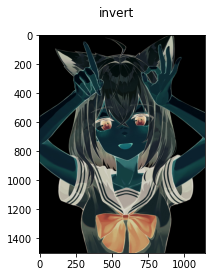

In [ ]:
# image invert #
invert_image = np.double(255-image.copy())
invert_image = np.clip(invert_image, 0, 255) # prevented from overflow

plt.suptitle("invert")
plt.imshow(invert_image.astype('uint8'))
plt.show()

![](https://i.imgur.com/AIimytN.png)

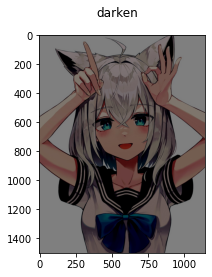

In [ ]:
# image darken #
darken_image = np.double(image.copy()) - 128
darken_image = np.clip(darken_image, 0, 255)

plt.suptitle("darken")
plt.imshow(darken_image.astype('uint8'))
plt.show()

![](https://i.imgur.com/XszAswI.png)

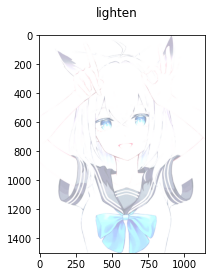

In [ ]:
# image lighten #
lighten_image = np.double(image.copy()) + 128
lighten_image = np.clip(lighten_image, 0, 255)

plt.suptitle("lighten")
plt.imshow(lighten_image.astype('uint8'))
plt.show()

![](https://i.imgur.com/09YUYb2.png)

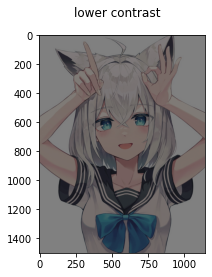

In [ ]:
# image Lower Contrast #
lower_contrast_image = np.round(image.copy()/2)


plt.suptitle("lower contrast")
plt.imshow(lower_contrast_image.astype(np.uint8))
plt.show()

![](https://i.imgur.com/YCVmvEt.png)

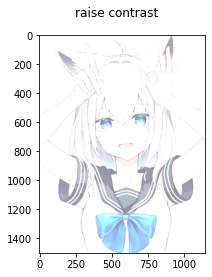

In [ ]:
# image raise contrast #
raise_contrast_image = np.double(image.copy())+ 100
raise_contrast_image = np.clip(raise_contrast_image, 0, 255)

plt.suptitle("raise contrast")
plt.imshow(raise_contrast_image.astype(np.uint8))
plt.show()

![](https://i.imgur.com/YkZYYnl.png)


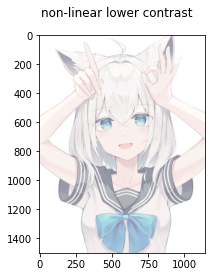

In [ ]:
# Non-linear lower contrast #
non_linear_lower_contrast_image = np.double(image.copy())
non_linear_lower_contrast_image = pow(non_linear_lower_contrast_image/255, 1/3) * 255

plt.suptitle("non-linear lower contrast")
plt.imshow(non_linear_lower_contrast_image.astype(np.uint8))
plt.show()

![](https://i.imgur.com/n5WNNUD.png)


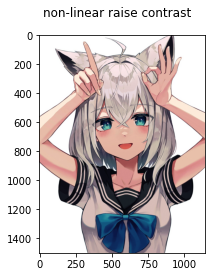

In [ ]:
# Non-linear raise contrast #
non_linear_raise_contrast_image = np.double(image.copy())
non_linear_raise_contrast_image = pow(non_linear_raise_contrast_image/255, 2) * 255

plt.suptitle("non-linear raise contrast")
plt.imshow(non_linear_raise_contrast_image.astype(np.uint8))
plt.show()

![](https://i.imgur.com/jMahpmf.png)


In [ ]:
len(image_list),len(pros_list)

(0, 0)

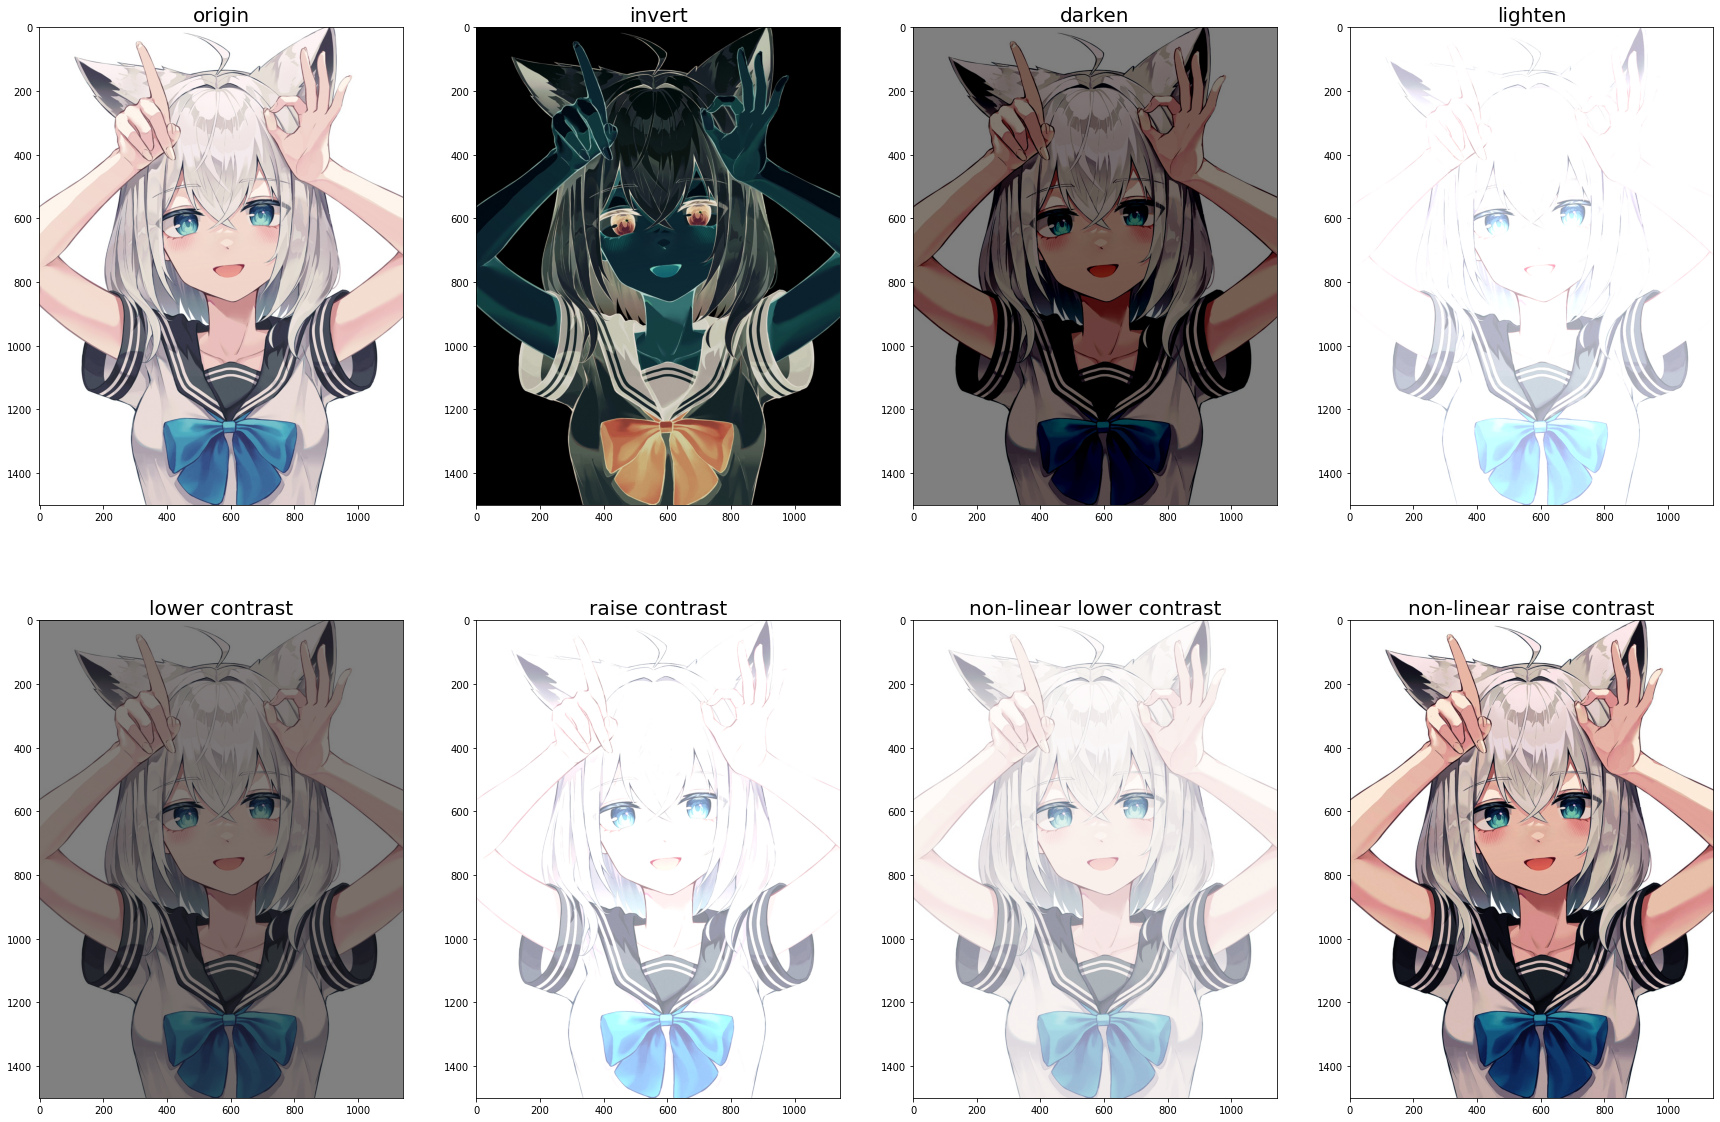

In [ ]:
# plot all the point processing image #
fig, ax = plt.subplots(2, 4, figsize=(30,20))

plt.subplot(2, 4, 1)
plt.title('origin', fontsize=20)
plt.imshow(image)

plt.subplot(2, 4, 2)
plt.title('invert', fontsize=20)
plt.imshow(invert_image.astype(np.uint8))

plt.subplot(2, 4, 3)
plt.title('darken', fontsize=20)
plt.imshow(darken_image.astype(np.uint8))

plt.subplot(2, 4, 4)
plt.title('lighten', fontsize=20)
plt.imshow(lighten_image.astype(np.uint8))

plt.subplot(2, 4, 5)
plt.title('lower contrast', fontsize=20)
plt.imshow(lower_contrast_image.astype(np.uint8))

plt.subplot(2, 4, 6)
plt.title('raise contrast', fontsize=20)
plt.imshow(raise_contrast_image.astype(np.uint8))

plt.subplot(2, 4, 7)
plt.title('non-linear lower contrast', fontsize=20)
plt.imshow(non_linear_lower_contrast_image.astype(np.uint8))

plt.subplot(2, 4, 8)
plt.title('non-linear raise contrast', fontsize=20)
plt.imshow(non_linear_raise_contrast_image.astype(np.uint8))

![](https://i.imgur.com/wWo7Cr4.png)


In [ ]:
fig.savefig('Point Processing.png') # save the image

# Filter

## Gaussian filter
### Opencv Library

In [ ]:
# image = cv2.imread("Lion.jpg")
# fig = plt.figure(figsize=(30,40))
# blurred = np.hstack([cv2.GaussianBlur(image,(3,3),0)[:,:,::-1],
#                      cv2.GaussianBlur(image,(5,5),0)[:,:,::-1],
#                      cv2.GaussianBlur(image,(7,7),0)[:,:,::-1]
#                      ])

# cv2.imwrite("Gaussian.jpg",blurred[:,:,::-1])
# plt.imshow(blurred)
# plt.show()

## Step1 : Get filter kernel

![image.png](https://i.imgur.com/oh9HkZA.png)

[OpenCV getGaussianKernel](https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html?highlight=gaussianblur#Mat%20getGaussianKernel(int%20ksize,%20double%20sigma,%20int%20ktype))

### getGaussianKernel(int ksize, double sigma, int ktype=CV_64F )

### Parameters:	
**ksize** – Aperture size. It should be odd ( $ksize\ mod\ 2 = 1$) and positive.

**sigma** – Gaussian standard deviation. If it is non-positive, it is computed from ksize as $\ \ sigma = 0.3*((ksize-1)*0.5 - 1) + 0.8$

**ktype** – Type of filter coefficients. It can be CV_32f or CV_64F .

$G_i = \alpha * e^{(-i-(ksize-1)/2)^2/(2*sigma^2)},$

$where\ i = 0 \sim ksize-1,\ and\ \alpha\ is\ the\ scale\ factor\ chosen\ so\ that \sum_iG_i=1$

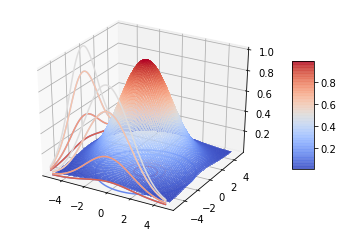

In [ ]:
sigma = 2
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import cm
from matplotlib import animation
from IPython.display import HTML
fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(-5, 5, 0.1)
Y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(X, Y)
Z = np.exp(-(X**2+Y**2)/(2*sigma**2))

# ax.zaxis.set_major_locator(LinearLocator(10))
# ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
surf = ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, cmap=cm.coolwarm,linewidth=0, antialiased=False,alpha=0.5)
# fig.colorbar(surf, shrink=0.5, aspect=5)
# ax.plot_wireframe(x, y, F(x), rstride=10, cstride=10)
cset = ax.contour(X, Y, Z, zdir='z', offset=-0.1, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-5.5, cmap=cm.coolwarm) 
cset = ax.contour(X, Y, Z, zdir='y', offset=-5.5, cmap=cm.coolwarm)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [ ]:
import math

def GaussiaFilter(KernelSize):
    sigma = 0.3*((KernelSize-1)*0.5 - 1) + 0.8
    kernel = []    
    total=0 #各係數相加後總值
    for i in range(0,KernelSize):
        for j in range(0,KernelSize):
          kernel = np.fromfunction(lambda i, j: (1/(2*math.pi*sigma**2)) * math.e ** ((-1*((i-(KernelSize-1)/2)**2+(j-(KernelSize-1)/2)**2))/(2*sigma**2)), (KernelSize, KernelSize))
    total = np.sum(kernel)
    return np.array(kernel)/total

row,col,_=image.shape
KernelSize=7

Gaussian_Kernel=GaussiaFilter(KernelSize)
#print(Gaussian_Kernel.reshape(KernelSize,-1))
print('Sum of filter :',np.sum(Gaussian_Kernel))

Sum of filter : 0.9999999999999998


## Step 2 : Convolution


[The difference between convolution and cross-correlation from a signal-analysis point of view](https://dsp.stackexchange.com/questions/27451/the-difference-between-convolution-and-cross-correlation-from-a-signal-analysis)

[Border type](https://docs.opencv.org/master/d2/de8/group__core__array.html#ga209f2f4869e304c82d07739337eae7c5)

![](https://i.imgur.com/qEYv2fV.png)
![](https://i.imgur.com/SGeFKLD.png)

In [ ]:
import cv2 as cv
# Convolution
resx=np.zeros((row,col,3),np.uint8) # initial a result image
#resx=np.zeros((row-int((KernalSize-1)/2),col-int((KernalSize-1)/2),3),np.uint8) #initial a result image

# for x in range(row):
#     for y in range(col):
#         if x<(KernelSize-1)/2 or x>=row-(KernelSize-1)/2 or y<(KernelSize-1)/2 or y>=col-(KernelSize-1)/2:
#           '''
#           Border type
#           '''
          
#         else:
#             respixel=0
#             for i in range(-(KernelSize-1)//2,(KernelSize+1)//2):
#                 for j in range(-(KernelSize-1)//2,(KernelSize+1)//2):

resx = cv.filter2D(image, dst=-1, ddepth=3, kernel=Gaussian_Kernel, anchor=(-1, -1), delta=0, borderType=cv2.BORDER_DEFAULT)

## Step3 Result

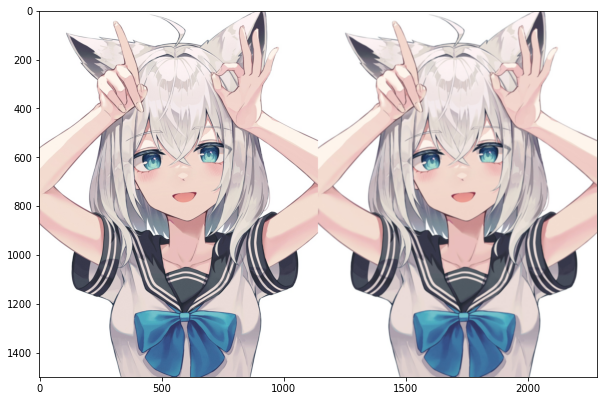

In [ ]:
fig = plt.figure(figsize=(10,20))
G_res = np.hstack([image[:,:],resx[:,:]])
plt.imshow(G_res)
cv2.imwrite("Gaussian_H.jpg",G_res[:,:,::-1])
plt.show()

# Downsampling

![](https://i.imgur.com/0zrrdKy.png)

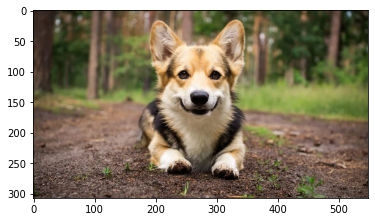

In [ ]:
img = cv2.imread('sampling1.jpg')
b,g,r = cv2.split(img)
img_RGB = cv2.merge([r,g,b])
plt.imshow(img_RGB)
plt.show()

In [ ]:
def DownSamplingFunction(src,samplingScale):
    [row,col,depth]=src.shape
    #新圖片大小為:newrow=row*samplingScale  newcol=col*samplingScale
    dst=np.zeros((round(row*samplingScale),round(col*samplingScale),depth), np.uint8)
    
    scale = round(1/samplingScale)
    
    for x in range(row//scale):
        for y in range(col//scale):
            temp = np.array([0, 0, 0])
            for i in range(scale):
                 for j in range(scale):
                    temp += src[x*scale + i, y*scale + j]
            dst[x, y] = temp/(scale*scale)
    return dst

### Downsampling Without Gaussian Filter

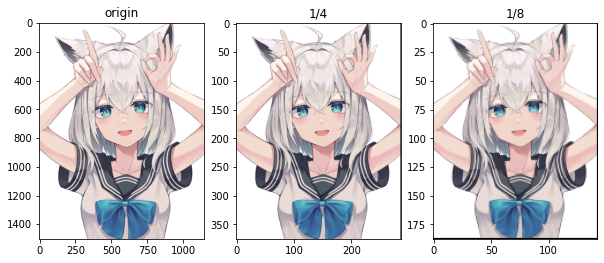

In [ ]:
DownSampling_4 = DownSamplingFunction(image.copy(),1/4)
DownSampling_8 = DownSamplingFunction(image.copy(),1/8)


fig = plt.figure(figsize=(10,6))

plt.subplot(1,3,1)
plt.title('origin')
plt.imshow(image)

plt.subplot(1,3,2)
plt.title('1/4')
plt.imshow(DownSampling_4)

plt.subplot(1,3,3)
plt.title('1/8')
plt.imshow(DownSampling_8)

![](https://i.imgur.com/LTz7nZq.png)

## Downsampling With Gaussian Filter

In [ ]:
## Gaussian 
Filtered_image = cv.GaussianBlur(image.copy(), (KernelSize,KernelSize), 0)
Downsampling_with_filter = DownSamplingFunction(Filtered_image, 1/4)

plt.imshow(Downsampling_with_filter)
plt.show()

![](https://i.imgur.com/4MTGgqV.png)

In [ ]:
plt.subplot(1,2,1)
plt.title('origin')
plt.imshow(image)

plt.subplot(1,2,2)
plt.title('Gaussian 1/4')
plt.imshow(DownSampling_with_filter)

![](https://i.imgur.com/La6hWUe.png)

# Upsampling

Chosing the 1/8 downsampling picture for upsampling
using Nearest-neighbor interpolation

In [ ]:
img_x,img_y,_ = img.shape
img_bic = cv2.resize(img_1_8_G, (img_y,img_x), interpolation=cv2.INTER_CUBIC) #INTER_CUBIC - a bicubic interpolation over 4x4 pixel neighborhood
img_nn = cv2.resize(img_1_8_G, (img_y,img_x),  interpolation=cv2.INTER_NEAREST)

plt.figure(figsize=(30,60))
plt.subplot(1,3,1)
plt.title('Origin')
plt.imshow(img[:,:,::-1])
plt.subplot(1,3,2)
plt.title('Nearest Neighbor interpolation')
plt.imshow(img_nn[:,:,::-1])
plt.subplot(1,3,3)
plt.title('Bicubic Interpolation')
plt.imshow(img_bic[:,:,::-1])
plt.show() 

![](https://i.imgur.com/xAKLyTS.png)

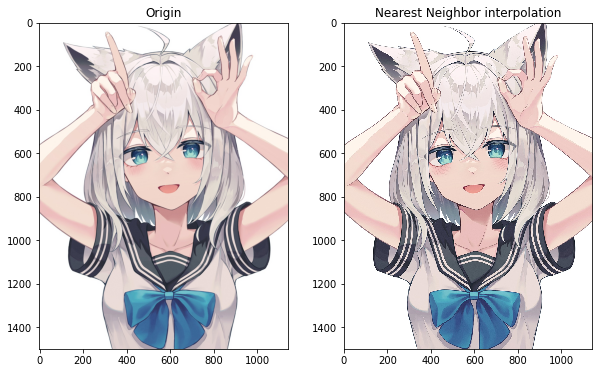

In [ ]:
# upsampling
def nearest_neighbor_resize(img, new_height, new_width):
    height, width = img.shape[0], img.shape[1]
    ret_img = np.zeros(shape=(new_height, new_width, 3), dtype='uint8')
    # scale factor
    s_h, s_c = (height * 1.0) / new_height, (width * 1.0) / new_width

    # insert pixel to the new img
    for i in range(0, new_height):
        for j in range(0, new_width):
            p_x = int(j * s_c)
            p_y = int(i * s_h)

            ret_img[i, j] = img[p_y, p_x]

    return ret_img

nn_image = nearest_neighbor_resize(image, image.shape[0], image.shape[1])

fig = plt.figure(figsize=(10,6))
ax = fig.subplots(1,2)
plt.subplot(1,2,1)
plt.title('Origin')
plt.imshow(image)

plt.subplot(1,2,2)
plt.title('Nearest Neighbor interpolation')
plt.imshow(nn_image,interpolation='none')

![](https://i.imgur.com/qPm43Z8.png)

# Bicubic Interpolation
### [Bicubic Interpolation](https://en.wikipedia.org/wiki/Bicubic_interpolation)
![](https://i.imgur.com/0WMYL73.png)

![](https://i.imgur.com/tQTZhga.png)

In [ ]:
import math

def bicubic_kernel(x, a):
  if (abs(x))>=0 & (abs(x)<=1):
    return (a+2)*(abs(x)**3-(a+3)*abs(x)**2)+1
  elif (abs(x)>1) & (abs(x)<=2):
    return a*abs(x)**3-(5*a)*(abs(x)**2)+(8*a)*abs(x)-4*a
  return 0

def padding(img,H,W,C):
    zimg = np.zeros((H+4,W+4,C))
    zimg[2:H+2,2:W+2,:C] = img
    #Pad the first/last two col and row
    zimg[2:H+2,0:2,:C]=img[:,0:1,:C]
    zimg[H+2:H+4,2:W+2,:]=img[H-1:H,:,:]
    zimg[2:H+2,W+2:W+4,:]=img[:,W-1:W,:]
    zimg[0:2,2:W+2,:C]=img[0:1,:,:C]
    #Pad the missing eight points
    zimg[0:2,0:2,:C]=img[0,0,:C]
    zimg[H+2:H+4,0:2,:C]=img[H-1,0,:C]
    zimg[H+2:H+4,W+2:W+4,:C]=img[H-1,W-1,:C]
    zimg[0:2,W+2:W+4,:C]=img[0,W-1,:C]
    return zimg

def bicubic(img, ratio, a):
   H,W,C = img.shape
   img = padding(image,H,W,C)
   # new image
   dH = math.floor(H*ratio)
   dW = math.floor(W*ratio)
   dst = np.zeros((dH, dW, 3))

   h = 1/ratio
   inc = 0
   for c in range(C):
      for j in range(dH):
          for i in range(dW):
                x, y = i * h + 2 , j * h + 2

                x1 = 1 + x - math.floor(x)
                x2 = x - math.floor(x)
                x3 = math.floor(x) + 1 - x
                x4 = math.floor(x) + 2 - x

                y1 = 1 + y - math.floor(y)
                y2 = y - math.floor(y)
                y3 = math.floor(y) + 1 - y
                y4 = math.floor(y) + 2 - y

                mat_l = np.matrix([[bicubic_kernel(x1,a),bicubic_kernel(x2,a),bicubic_kernel(x3,a),bicubic_kernel(x4,a)]])
                mat_m = np.matrix([[img[int(y-y1),int(x-x1),c],img[int(y-y2),int(x-x1),c],img[int(y+y3),int(x-x1),c],img[int(y+y4),int(x-x1),c]],
                                   [img[int(y-y1),int(x-x2),c],img[int(y-y2),int(x-x2),c],img[int(y+y3),int(x-x2),c],img[int(y+y4),int(x-x2),c]],
                                   [img[int(y-y1),int(x+x3),c],img[int(y-y2),int(x+x3),c],img[int(y+y3),int(x+x3),c],img[int(y+y4),int(x+x3),c]],
                                   [img[int(y-y1),int(x+x4),c],img[int(y-y2),int(x+x4),c],img[int(y+y3),int(x+x4),c],img[int(y+y4),int(x+x4),c]]])
                mat_r = np.matrix([[bicubic_kernel(y1,a)],[bicubic_kernel(y2,a)],[bicubic_kernel(y3,a)],[bicubic_kernel(y4,a)]])
                dst[j, i, c] = np.dot(np.dot(mat_l, mat_m),mat_r)
   return dst

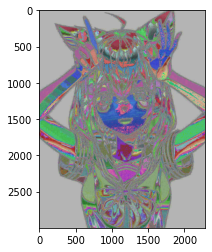

In [ ]:
ratio = 2
a = -1/2
bicubic_image = bicubic(image, ratio, a)

plt.imshow(bicubic_image.astype('uint8'))
plt.show()

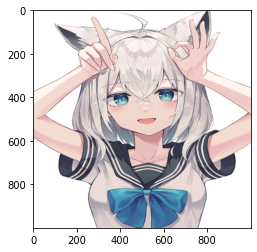

In [284]:
bicubic_image = cv2.resize(image, (1000, 1000), interpolation=cv2.INTER_CUBIC)
plt.imshow(bicubic_image.astype('uint8'))
plt.show()